In [2]:
import numpy as np

# Define possible actions in the environment
ACTION_SPACE = ('U', 'D', 'L', 'R')  # U: Up, D: Down, L: Left, R: Right

class Grid:  # Environment representing a grid world
  def __init__(self, rows, cols, start):
    """
    Initialize the grid environment with the given dimensions and starting position.
    :param rows: Number of rows in the grid
    :param cols: Number of columns in the grid
    :param start: Starting position (i, j) for the agent
    """
    self.rows = rows
    self.cols = cols
    self.i = start[0]
    self.j = start[1]

  def set(self, rewards, actions):
    """
    Set the rewards and possible actions for each cell in the grid.
    :param rewards: Dictionary where keys are (i, j) positions and values are rewards
    :param actions: Dictionary where keys are (i, j) positions and values are lists of allowed actions
    """
    self.rewards = rewards
    self.actions = actions

  def set_state(self, s):
    """
    Set the agent's position in the grid to a specific state.
    :param s: Tuple (i, j) representing the agent's new position
    """
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    """
    Returns the current state (position) of the agent.
    :return: Tuple (i, j) representing the agent's current position
    """
    return (self.i, self.j)

  def is_terminal(self, s):
    """
    Check if a state is terminal, meaning there are no actions available from this state.
    :param s: Tuple (i, j) representing a state
    :return: True if the state is terminal, False otherwise
    """
    return s not in self.actions

  def reset(self):
    """
    Reset the agent to the starting position.
    :return: Tuple (i, j) representing the agent's start position
    """
    self.i = 2
    self.j = 0
    return (self.i, self.j)

  def get_next_state(self, s, a):
    """
    Get the next state given a current state and an action.
    :param s: Current state (i, j) as a tuple
    :param a: Action to be taken ('U', 'D', 'L', 'R')
    :return: Tuple (new_i, new_j) representing the next state after taking action
    """
    i, j = s[0], s[1]

    # Update position based on the action, if the action is allowed from the current state
    if a in self.actions[(i, j)]:
      if a == 'U':
        i -= 1
      elif a == 'D':
        i += 1
      elif a == 'R':
        j += 1
      elif a == 'L':
        j -= 1
    return i, j

  def move(self, action):
    """
    Move the agent in the specified direction, if the action is allowed from the current position.
    :param action: Action to take ('U', 'D', 'L', 'R')
    :return: Reward received after taking the action
    """
    # Check if the action is valid in the current state
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        self.i -= 1
      elif action == 'D':
        self.i += 1
      elif action == 'R':
        self.j += 1
      elif action == 'L':
        self.j -= 1
    # Return the reward for the new position, defaulting to 0 if no reward is defined
    return self.rewards.get((self.i, self.j), 0)

  def undo_move(self, action):
    """
    Undo the last move, moving the agent in the opposite direction of the action.
    :param action: Action to undo ('U', 'D', 'L', 'R')
    """
    # Move in the opposite direction of the specified action
    if action == 'U':
      self.i += 1
    elif action == 'D':
      self.i -= 1
    elif action == 'R':
      self.j -= 1
    elif action == 'L':
      self.j += 1
    # Ensure the state after undoing is valid
    assert(self.current_state() in self.all_states())

  def game_over(self):
    """
    Check if the game is over, which is true if the agent is in a terminal state.
    :return: True if in a terminal state, False otherwise
    """
    return (self.i, self.j) not in self.actions

  def all_states(self):
    """
    Get all possible states in the grid, defined as any position with actions or rewards.
    :return: Set of tuples representing all possible states
    """
    return set(self.actions.keys()) | set(self.rewards.keys())


def standard_grid():
  """
  Define a standard 3x4 grid with rewards and actions.
  Layout:
    .  .  .  1
    .  x  . -1
    s  .  .  .
  Legend:
    - s: Starting position
    - x: Blocked position (no actions allowed)
    - Numbers: Rewards at certain states

  :return: An instance of the Grid class with rewards and actions set
  """
  g = Grid(3, 4, (2, 0))  # 3x4 grid with start position at (2, 0)

  # Define rewards for reaching specific states
  rewards = {(0, 3): 1, (1, 3): -1}

  # Define possible actions from each state
  actions = {
    (0, 0): ('D', 'R'),  # Can go Down or Right from (0, 0)
    (0, 1): ('L', 'R'),  # Can go Left or Right from (0, 1)
    (0, 2): ('L', 'D', 'R'),  # Can go Left, Down, or Right from (0, 2)
    (1, 0): ('U', 'D'),  # Can go Up or Down from (1, 0)
    (1, 2): ('U', 'D', 'R'),  # Can go Up, Down, or Right from (1, 2)
    (2, 0): ('U', 'R'),  # Can go Up or Right from (2, 0)
    (2, 1): ('L', 'R'),  # Can go Left or Right from (2, 1)
    (2, 2): ('L', 'R', 'U'),  # Can go Left, Right, or Up from (2, 2)
    (2, 3): ('L', 'U'),  # Can go Left or Up from (2, 3)
  }

  # Set rewards and actions in the grid
  g.set(rewards, actions)
  return g

def negative_grid(step_cost=-0.1):
  """
  Create a variation of the standard grid where each move incurs a penalty.

  This function modifies the rewards in the standard grid to include a step cost,
  penalizing each move the agent makes. This incentivizes the agent to minimize
  the number of steps taken to reach terminal states.

  :param step_cost: The penalty for each step taken (default: -0.1).
  :return: An instance of the Grid class with updated rewards.
  """
  # Create the standard grid
  g = standard_grid()

  # Update the rewards in the grid to include a step cost
  # The step cost is applied to all non-terminal states
  g.rewards.update({
    (0, 0): step_cost,  # Penalize movement in state (0, 0)
    (0, 1): step_cost,  # Penalize movement in state (0, 1)
    (0, 2): step_cost,  # Penalize movement in state (0, 2)
    (1, 0): step_cost,  # Penalize movement in state (1, 0)
    (1, 2): step_cost,  # Penalize movement in state (1, 2)
    (2, 0): step_cost,  # Penalize movement in state (2, 0)
    (2, 1): step_cost,  # Penalize movement in state (2, 1)
    (2, 2): step_cost,  # Penalize movement in state (2, 2)
    (2, 3): step_cost,  # Penalize movement in state (2, 3)
    })

  # Return the modified grid
  return g

Episode 0/100000
Episode 10000/100000
Episode 20000/100000
Episode 30000/100000
Episode 40000/100000
Episode 50000/100000
Episode 60000/100000
Episode 70000/100000
Episode 80000/100000
Episode 90000/100000

Rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


Optimal Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


Final Value Function:
---------------------------
 0.56| 0.78| 1.00| 0.00|
---------------------------
 0.39| 0.00| 0.77| 0.00|
---------------------------
 0.23| 0.37| 0.57| 0.36|




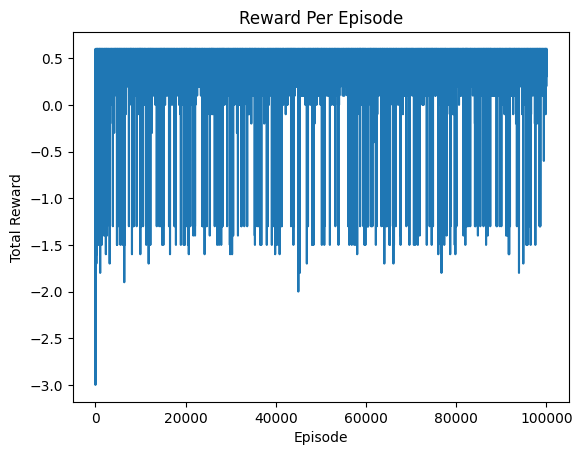

In [3]:
import matplotlib.pyplot as plt

ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

def print_values(V, g):
    """
    Print the value function in a grid layout.
    :param V: Dictionary mapping each state to its value.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i, j), 0)  # Get the value for each state, default to 0 if not in V
            if v >= 0:
                print(" %.2f|" % v, end="")  # Format for positive values
            else:
                print("%.2f|" % v, end="")  # Format for negative values
        print("")
    print("\n")

def print_policy(P, g):
    """
    Print the policy in a grid layout.
    :param P: Dictionary mapping each state to the optimal action under the policy.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i, j), ' ')  # Get the action for each state, default to blank if not in policy
            print("  %s  |" % a, end="")
        print("")
    print("\n")

def max_dict(d):
    """
    Return the key with the maximum value and the corresponding max value from a dictionary.
    :param d: Dictionary where keys are actions and values are their corresponding scores.
    :return: A tuple (key, max_value).
    """
    # Find the maximum value in the dictionary
    max_val = max(d.values())

    # Find all keys corresponding to the maximum value (in case of ties)
    max_keys = [key for key, val in d.items() if val == max_val]

    # Randomly choose one of the keys with the maximum value (break ties randomly)
    return np.random.choice(max_keys), max_val

def epsilon_greedy(Q, s, eps=0.1):
    """
    Select an action using the epsilon-greedy strategy.

    The epsilon-greedy strategy balances exploration (choosing a random action) and
    exploitation (choosing the best-known action based on current Q-values).

    :param Q: Dictionary where keys are states and values are dictionaries
              of actions with their corresponding Q-values.
              Example: Q[state][action] = Q-value
    :param s: Current state (tuple). Example: (row, column) in a grid world.
    :param eps: Probability of exploring a random action (default: 0.1).
    :return: Selected action ('U', 'D', 'L', 'R').
    """
    # Generate a random number between 0 and 1
    if np.random.random() < eps:
        # Exploration: With probability eps, select a random action
        return np.random.choice(ALL_POSSIBLE_ACTIONS)
    else:
        # Exploitation: Select the action with the highest Q-value for the current state
        # Use max_dict to find the action with the maximum Q-value
        a_opt = max_dict(Q[s])[0]  # max_dict returns (key, max_value), we take the key (action)
        return a_opt


def sarsa(grid, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=10000, plot=True, verbose=True):
    """
    Perform SARSA (on-policy TD control) to learn an optimal policy.

    :param grid: Grid object representing the environment.
    :param gamma: Discount factor for future rewards (default: 0.9).
    :param alpha: Learning rate for TD updates (default: 0.1).
    :param epsilon: Exploration probability for epsilon-greedy (default: 0.1).
    :param episodes: Number of episodes to simulate (default: 10,000).
    :param plot: If True, plot the convergence graph (default: True).
    :param verbose: If True, print progress and final outputs (default: True).
    :return: A tuple (Q, policy) where Q is the action-value function and policy is the optimal policy.
    """
    # Initialize Q(s, a) as a nested dictionary
    Q = {s: {a: 0 for a in ALL_POSSIBLE_ACTIONS} for s in grid.all_states()}

    # Track rewards per episode
    reward_per_episode = []

    for episode in range(episodes):
        if verbose and episode % (episodes // 10) == 0:
            print(f"Episode {episode}/{episodes}")

        # Reset the environment to start a new episode
        s = grid.reset()

        # Choose an initial action using epsilon-greedy policy
        a = epsilon_greedy(Q, s, eps=epsilon)

        episode_reward = 0

        while not grid.game_over():
            # Take action and observe the reward and next state
            r = grid.move(a)
            s_next = grid.current_state()

            # Update cumulative reward for the episode
            episode_reward += r

            # Choose the next action using epsilon-greedy
            a_next = epsilon_greedy(Q, s_next, eps=epsilon)

            # Update Q(s, a) using SARSA update rule
            Q[s][a] += alpha * (r + gamma * Q[s_next][a_next] - Q[s][a])

            # Update current state and action
            s, a = s_next, a_next

        # Log the total reward for the episode
        reward_per_episode.append(episode_reward)

    # Derive the optimal policy and value function from Q
    policy = {}
    V = {}
    for s in grid.actions.keys():
        a, max_q = max_dict(Q[s])  # Extract best action and its Q-value
        policy[s] = a
        V[s] = max_q

    # print rewards, policy, and value function
    print("\nRewards:")
    print_values(grid.rewards, grid)

    print("Optimal Policy:")
    print_policy(policy, grid)

    print("Final Value Function:")
    print_values(V, grid)

    # Plot rewards if plot=True
    if plot:
        plt.plot(reward_per_episode)
        plt.title("Reward Per Episode")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.show()

    return policy, V


if __name__ == "__main__":
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 100000

    # Use the negative grid to include step costs
    grid = negative_grid(step_cost=-0.1)

    # Run SARSA to learn the optimal policy
    sarsa(grid, gamma=gamma, alpha=alpha, epsilon=epsilon, episodes=episodes, plot=True, verbose=True)